Version 1.0.0,
Python 3.6.4,
conda 4.4.11

This is my first Kaggle Competition project written in a notebook.

# Final Project: Predict Future Sales

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

## Getting and Cleaning Data

Load data:

In [2]:
DATA_FOLDER = 'readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

test            = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv'))

Look at the data:

In [3]:
print(transactions.shape)
#print(transactions.tail())

print(items.shape)
#print(items.head())

print(item_categories.shape)
#print(item_categories.head())

print(shops.shape)
#print(shops.head())

print(test.shape)
print(test.tail())

(2935849, 6)
(22170, 3)
(84, 2)
(60, 2)
(214200, 3)
            ID  shop_id  item_id
214195  214195       45    18454
214196  214196       45    16188
214197  214197       45    15757
214198  214198       45    19648
214199  214199       45      969


Merge the data:

In [4]:
df = pd.merge(transactions, items, on='item_id')
df_new = pd.merge(df, item_categories, on='item_category_id')
df = pd.merge(df_new, shops, on='shop_id')
df.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,26.04.2013,3,59,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
2,26.06.2013,5,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
3,20.07.2013,6,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
4,14.09.2013,8,59,944,299.0,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
5,21.10.2013,9,59,944,299.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
6,02.11.2013,10,59,944,299.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
7,06.01.2014,12,59,944,299.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
8,30.03.2014,14,59,944,299.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
9,20.04.2014,15,59,944,199.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""


In [6]:
print(df.isnull().any().any())
print(df.info())

False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
date                  object
date_block_num        int64
shop_id               int64
item_id               int64
item_price            float64
item_cnt_day          float64
item_name             object
item_category_id      int64
item_category_name    object
shop_name             object
dtypes: float64(2), int64(4), object(4)
memory usage: 246.4+ MB
None


There are no missing values. Some types can be converted to int32 or float32 before using the model.

In [7]:
a = pd.to_datetime(df['date'], dayfirst=True, format='%d.%m.%Y')
#df_date = df.loc[(a.dt.month == 9) & (a.dt.year == 2014)]

In [10]:
df_clean = df
df_clean = df_clean.assign(year = a.dt.year)
df_clean = df_clean.assign(month = a.dt.month)
df_clean = df_clean.assign(day = a.dt.day)
df_time = df_clean[['year', 'month', 'day']]
df_days = df_time.day
df_months = df_time.month
df_years = df_time.year
#df_new = df_new.assign(total = df_new.item_price*df_new.item_cnt_day)
#max_revenue = df_new.groupby(['shop_id']).total.sum().max()
#print(max_revenue)
print(df_time.head())

   year  month  day
0  2013      1    2
1  2013      4   26
2  2013      6   26
3  2013      7   20
4  2013      9   14


In [ ]:
df_summer = df.loc[((a.dt.month == 6) | (a.dt.month == 7) | (a.dt.month == 8)) & (a.dt.year == 2014)]
df_summer = df_summer.assign(total = df_summer.item_price*df_summer.item_cnt_day)
max_revenue = df_summer.groupby(['item_category_id']).total.sum()
max_revenue.sort_values(ascending=False, inplace=True)
category_id_with_max_revenue = max_revenue.index[0]
print(category_id_with_max_revenue)

In [ ]:
df_unique = pd.DataFrame(transactions.groupby(['item_id']).item_price.nunique())
num_items_constant_price = len(df_unique[df_unique.item_price==1])
print(num_items_constant_price)

In [ ]:
shop_id = 25
df_25 = df.loc[(a.dt.month == 12) & (a.dt.year == 2014)]
df_shop = df_25[df_25.shop_id == 25]
total_num_items_sold = df_shop.groupby([a.dt.day]).item_cnt_day.sum()#df_shop.item_cnt_day.sum()
days = total_num_items_sold.index

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = np.var(total_num_items_sold, ddof=1)
print(total_num_items_sold_var)

Now, I am looking at each of the columns, make a histogram. The goal is to find interesting features and/or missing data. 

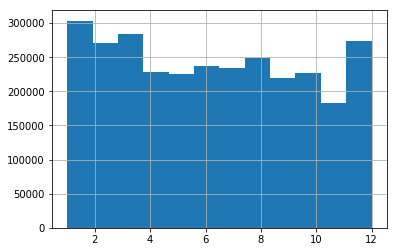

In [11]:
df_months.hist(bins=12)

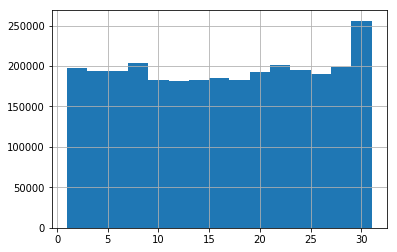

In [12]:
df_days.hist(bins=15)

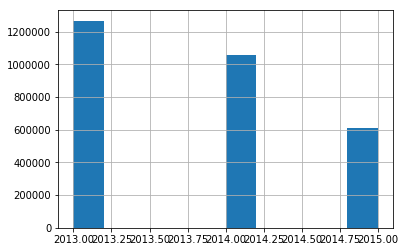

In [13]:
df_years.hist()

We can see, that at the end of the month, people buy more. Also the sales are higher at the end of the year and at the beginning of the year. Both make sense. The sales decrease over the years. Consider making features, which take into account this behaviour.

In [14]:
print(len(df_clean.date_block_num.unique()))

34


I think we should split the time by `date_block_num`, which counts the month from the start by time. 

[59 24 27 25  6 15  7 31 54 42 38 37 46 44 51 16  1  0 28 57 23 58 56 35
 47 21 22 19 18  8 30 41 45 32 29 50 53 43 17  2 52 13 14  3 10 12 26  5
  4 39 48 49 34 11 36 33  9 40 20 55]
60


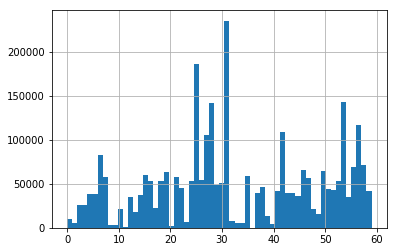

In [15]:
print(df_clean.shop_id.unique())
print(len(df_clean.shop_id.unique()))
df_clean.shop_id.hist(bins=60)

There are 60 different shops. In the first step, I am not interested in the shop names. But they can also be useful as features.

In [16]:
print(df_clean.item_id.unique())
print(len(df_clean.item_id.unique()))

[22154   944   965 ... 13091 13094 13092]
21807


There are 21807 items. Here again, I am not looking at the items in the first step. But these can be important features. What items are these? Can we group them into subgroups?

[ 999.          150.          199.5        ... 2266.33333333 2485.28571429
  912.75      ]
19993


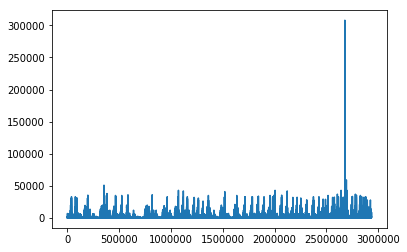

In [17]:
print(df_clean.item_price.unique())
print(len(df_clean.item_price.unique()))
df_clean.item_price.plot()

In [18]:
print(df_clean.item_price.min())
print(df_clean.item_price.max())

-1.0
307980.0


It is not possible to have a negative price, and also the maximum seems to me to be an outlier. Take care of these numbers. We should look what items these are and then insert the correct price if possible. If not...?

In [19]:
print(df_clean.item_price[df.item_price <= 0])
print(df_clean.item_price[df.item_price > 100000])

2256678   -1.0
Name: item_price, dtype: float64
2678303    307980.0
Name: item_price, dtype: float64


In [20]:
item_outlier1 = df_clean.item_id[2256678]
item_outlier2 = df_clean.item_id[2678303]

print(item_outlier1)
print(item_outlier2)

print(df_clean.item_price[df.item_id == item_outlier1])
print(df_clean.item_price[df.item_id == item_outlier2])

2973
6066
9688       2499.00
9689       2499.00
9690       2499.00
9691       2499.00
9692       2499.00
9693       2499.00
9694       2499.00
9695       1249.50
9696       1249.00
9697       1249.50
9698       1249.50
9699       1562.03
9700       1250.00
53330      2499.00
53331      2499.00
53332      2498.50
53333      2499.00
53334      2499.00
53335      2499.00
53336      2248.80
53337      1249.50
53338      1249.50
53339      1250.00
122159     2499.00
122160     2499.00
122161     2499.00
122162     2499.00
122163     2499.00
122164     2499.00
122165     2499.00
            ...   
2709965    2499.00
2709966    2499.00
2709967    2499.00
2709968    2499.00
2709969    1249.00
2709970    1249.00
2709971    1249.00
2709972    1249.00
2709973    1275.27
2709974    1249.50
2709975    1562.03
2709976    1249.50
2709977    1250.00
2709978    1249.50
2761238    1249.50
2761239    1249.00
2761240    1249.50
2761241    1249.50
2799723    2499.00
2799724    2499.00
2799725    2499.00
27

So, there are different prices for this single item, which means, we could take simply the average of the prices or we look at the specific shop. It could be, that in this shop the prices are always lower/higher, than we take this price. Or we look also at the time. Often the prices are different depending on time. For the second outlier? there is only one item sold. So we have to check, what item this is and where it is sold. Is this really an outlier? We cannot insert a number, but depending on the model we will use Nan would work fine. Yes, and maybe we check first the test data. Is there an item price as high as this one?

In [21]:
print(df_clean.iloc[2256678])

date                                                 15.05.2013
date_block_num                                                4
shop_id                                                      32
item_id                                                    2973
item_price                                                   -1
item_cnt_day                                                  1
item_name             DmC Devil May Cry [PS3, русские субтитры]
item_category_id                                             19
item_category_name                                   Игры - PS3
shop_name                            Москва ТЦ "Серебряный Дом"
year                                                       2013
month                                                         5
day                                                          15
Name: 2256678, dtype: object


In [22]:
print(df_clean.loc[(df_clean.item_id==item_outlier1) & (df_clean.shop_id==32)])

               date  date_block_num  shop_id  item_id  item_price  \
2256668  29.01.2013               0       32     2973      2499.0   
2256669  25.01.2013               0       32     2973      2499.0   
2256670  22.01.2013               0       32     2973      2499.0   
2256671  21.01.2013               0       32     2973      2499.0   
2256672  18.01.2013               0       32     2973      2499.0   
2256673  17.01.2013               0       32     2973      2499.0   
2256674  15.01.2013               0       32     2973      2499.0   
2256675  05.02.2013               1       32     2973      2499.0   
2256676  14.02.2013               1       32     2973      2499.0   
2256677  23.05.2013               4       32     2973      1249.0   
2256678  15.05.2013               4       32     2973        -1.0   
2256679  06.05.2013               4       32     2973      2499.0   
2256680  05.06.2013               5       32     2973      1249.5   

         item_cnt_day            

So the price is either 2499.0 or 1249.0. I check if this shop starts price reductions on a specific day. Since it is only a single number, I think it will not influence the output a lot.

In [23]:
df_check = df_clean.loc[(df_clean.day > 13) &(df_clean.month==5) & (df_clean.shop_id==32)]
diff = df_check.groupby(['item_id']).item_price.diff()
diff.sort_values(ascending=False, inplace=True)
id_with_max_diff = diff.index[0:6]

print(id_with_max_diff)
print(df_clean.iloc[2259037])

Int64Index([2258753, 2258969, 2259020, 2261478, 2255488, 2259037], dtype='int64')
date                                                         24.05.2013
date_block_num                                                        4
shop_id                                                              32
item_id                                                            6134
item_price                                                          579
item_cnt_day                                                          3
item_name             Resident Evil: Revelations [PC, Jewel, русские...
item_category_id                                                     30
item_category_name                        Игры PC - Стандартные издания
shop_name                                    Москва ТЦ "Серебряный Дом"
year                                                               2013
month                                                                 5
day                                                   

I did this not in a clean way. It takes me too much time since I am not that good in python yet. But I have seen, that the price reduction was not before the 20th of May. So I will change the -1 to 2499.0 in the `df_clean` data frame.

In [24]:
df_clean.item_price.replace(to_replace=-1, value=2499.0 , inplace=True) 
#print(df_clean.loc[(df_clean.item_id==item_outlier1) & (df_clean.shop_id==32)])

In [25]:
print(test.loc[(test.item_id ==2678303) ])

Empty DataFrame
Columns: [ID, shop_id, item_id]
Index: []


Since there is no item with the same `item_id` in the test set, we can delete this row containing the high item price of 307980.0.

In [26]:
df_clean.drop(df_clean.index[2678303], inplace=True)
print(df_clean.item_price[df.item_price > 100000])

Series([], Name: item_price, dtype: float64)


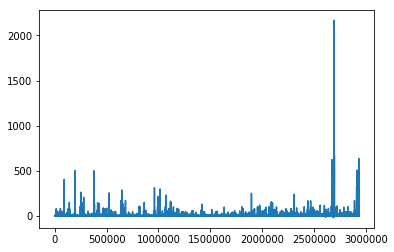

In [27]:
df_clean.item_cnt_day.plot()

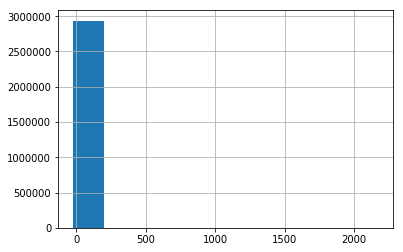

In [29]:
df_clean.item_cnt_day.hist()

In [30]:
print(df_clean.loc[(df_clean.item_cnt_day > 700)])
print(df_clean.loc[(df_clean.item_cnt_day < -5)])

               date  date_block_num  shop_id  item_id  item_price  \
2693208  15.01.2015              24       12    20949    4.000000   
2694327  28.10.2015              33       12    11373    0.908714   

         item_cnt_day                                          item_name  \
2693208        1000.0  Фирменный пакет майка 1С Интерес белый (34*42)...   
2694327        2169.0               Доставка до пункта выдачи (Boxberry)   

         item_category_id                        item_category_name  \
2693208                71  Подарки - Сумки, Альбомы, Коврики д/мыши   
2694327                 9                           Доставка товара   

                   shop_name  year  month  day  
2693208  Интернет-магазин ЧС  2015      1   15  
2694327  Интернет-магазин ЧС  2015     10   28  
               date  date_block_num  shop_id  item_id   item_price  \
998699   19.10.2013               9       42     3732  2599.000000   
2614214  10.07.2014              18       14    20949     5.00

This looks reasonable. We have to think how we create the features here.

[37 58 56 59 55 23 19 28 30 21 40 75 49 29 22 67 73 77 57 60  4 62 43 15
  2  3  5 35 33  6 38 25 14 45 41 66 11 69 65 64 79 63 70 13 83 72 61 71
 32 39 12 20 17  8 16 24  7 47 42 80 68 82 81  0 46 53 18 51 48  1 50  9
 10 52 31 76 78 54 44 34 74 26 27 36]
84


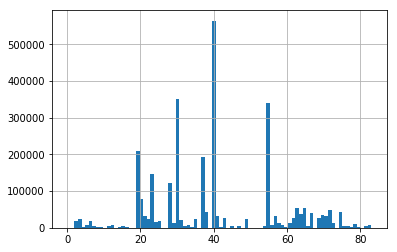

In [31]:
print(df_clean.item_category_id.unique())
print(len(df_clean.item_category_id.unique()))
df_clean.item_category_id.hist(bins=84)

## Feature Extraction

Possible features are all the id's and the `date`, also the `item_price` and `item_cent_per_day`. What is `date_block_num`, which of course can also be a feature.

TODO: So, first thing would be to order by date and split the train test data...

## Explore Data